<a href="https://colab.research.google.com/github/ceydab/NLP_Projects/blob/main/ASR%26T2S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-to-Speech
This is a basic implementation of speech technology pipelines that allows the user to create sound from a desired text, and also turn the audio back to text. Additionally, with the given web application, users can record sound using the device microphone or upload a sound file, and transcribe it.

In [ ]:
!pip install gradio -q

In [ ]:
from transformers import pipeline
import gradio as gr

In [ ]:
pipe_speech2text = pipeline('automatic-speech-recognition', model="facebook/wav2vec2-base-960h")
pipe_text2speech = pipeline('text-to-speech')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are 

In [ ]:
def vocalize(text):
  audio = pipe_text2speech(text)
  with open("audio.wav", "wb") as f:
    f.write(audio["audio"])
  return audio

In [ ]:
def transcribe(audio, state=''):
  audio_data = audio['audio'].squeeze()
  audio_input = {"raw": audio_data, "sampling_rate": 24000}
  text = pipe_speech2text(audio_input)['text']
  state += text + ' '
  return state, state

In [ ]:
text = "hello, example project"
audio_produced = vocalize(text)
text_produced = transcribe(audio_produced)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
print(text_produced)

('HELLO EXAMPLE PROJECT ', 'HELLO EXAMPLE PROJECT ')


In [ ]:
gr.Interface(
    fn = transcribe,
    inputs = [
        gr.Audio(type='filepath'),
        'state'
    ],
    outputs = [
        'textbox',
        'state'
    ],
    live = False
).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b182ddd0635d09ac84.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


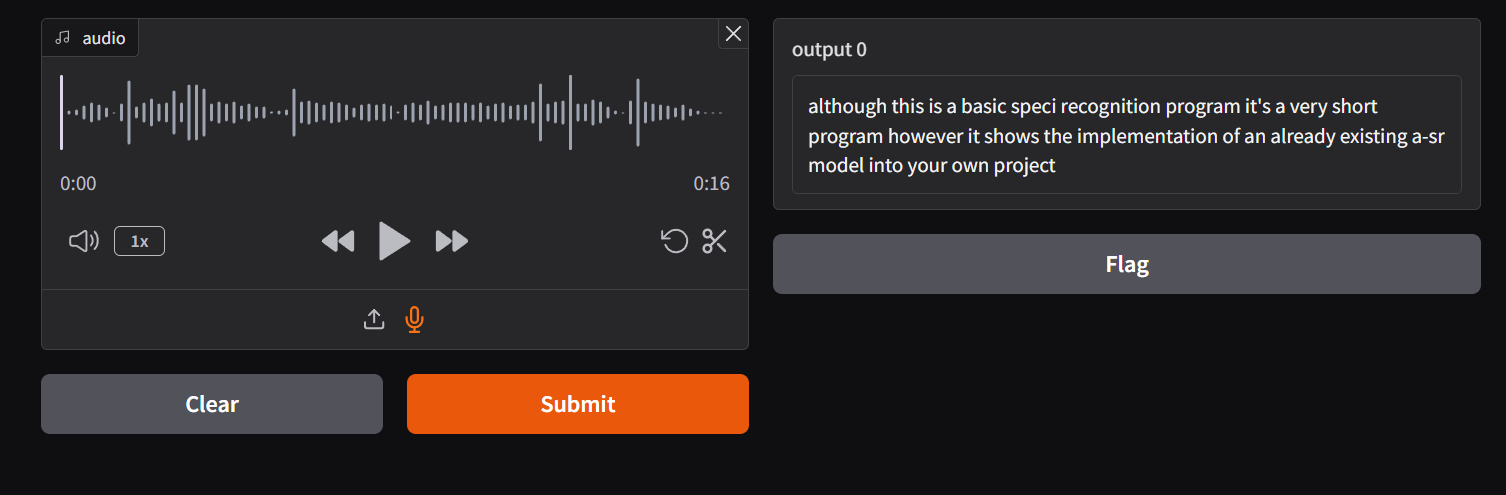